# MA - INF 2201 - Computer Vision WS 22/23

### Exercise Sheet 03


In [9]:
import numpy as np
import cv2 as cv
import random
from collections import defaultdict

from matplotlib import pyplot as plt


### 1. Hough Transform for Circles

Read the image billiards.png.

**(a)** Detect the circles by a Hough transform using cv2.HoughCircles.
Visualize the detections by drawing circles on the image.

**(b)** Implement the function myHoughCircles and use it to detect the circles.
Visualize the detections and comment on how the result varies with different
parameters.

(5 Points)

Task 1 (a) ...
Task 1 (b) ...


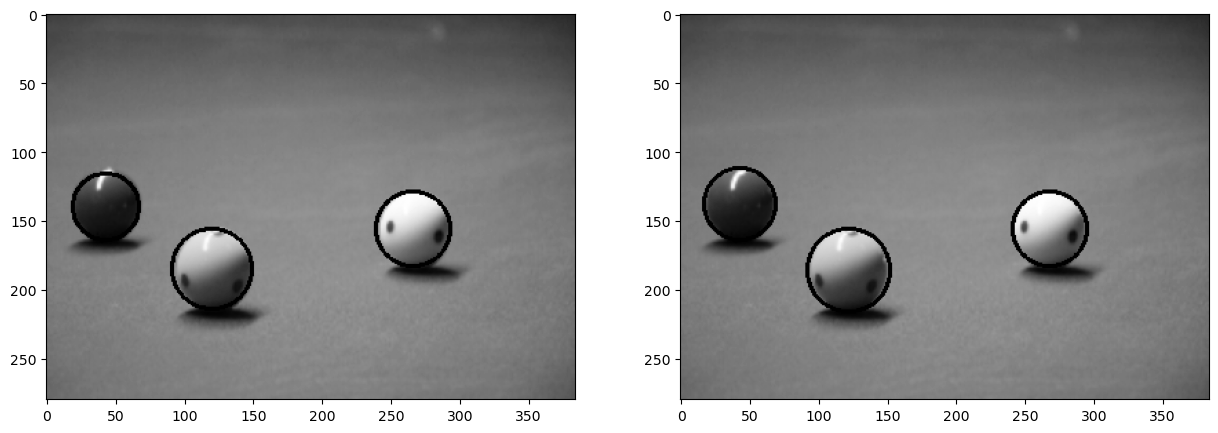

In [10]:
def task_1_a():
    print("Task 1 (a) ...")
    img = cv.imread('../images/billiards.png', cv.IMREAD_GRAYSCALE)

    circles = cv.HoughCircles(image=img, 
        method=cv.HOUGH_GRADIENT, 
        dp=1, 
        minDist=img.shape[0]/8,
        param1=300,
        param2=15, 
        minRadius=10,
        maxRadius=100
        )
    circles = np.array(circles).astype(int)

    img_temp = img.copy()
    for circ in circles[0, :]:
        cv.circle(img_temp, ((circ[0]), (circ[1])), circ[2], (0,0,255), 2)

    return img_temp


def myHoughCircles(edges, minRadius, maxRadius, threshold, minDist):
    """
    Your implementation of HoughCircles
    :edges: single-channel binary source image (e.g: edges)
    :minRadius: minimum circle radius
    :maxRadius: maximum circle radius
    :param threshold: minimum number of votes to consider a detection
    :minDist: minimum distance between two centers of the detected circles. 
    :return: list of detected circles as (a, b, r) triplet
    """
    # credits to https://github.com/adityaintwala/Hough-Circle-Detection

    rs = np.arange(minRadius, maxRadius, step=1)
    thethas = np.arange(0, 360, step=10)

    # set up accumulator
    circle_candidates = []
    # loop over radius
    for r in rs:
        #loop over angle
        for t in thethas:
            circle_candidates.append(
                (r, int(r * np.cos(np.deg2rad(t))), int(r * np.sin(np.deg2rad(t))))
            )

    accumulator = defaultdict(int)

    for y in range(edges.shape[0]):
        for x in range(edges.shape[1]):
            # only regard gradients bigger than 0
            if edges[y, x] != 0:
                # 
                for r, rcos_t, rsin_t in circle_candidates:
                    a = int(x - rcos_t)
                    b = int(y - rsin_t)
                    accumulator[(a, b, r)] +=1

    # set up circle list
    detected_circles = []

    # loop over accumulator and entries
    # only add to detected circles if votes
    for entry in accumulator:
        circles = entry
        votes = accumulator[entry]
        if votes >= threshold:
            detected_circles.append(circles)

    return detected_circles


def task_1_b():
    print("Task 1 (b) ...")
    img_gray = cv.imread('../images/billiards.png', cv.IMREAD_GRAYSCALE)
    minRadius = 10
    maxRadius = 100
    minDist = img_gray.shape[0]/8
    # 14 seems to be the best value (tried some values from 10-15)
    threshold = 14
    # resolution = 1
    edges = cv.Canny(img_gray, 100, 200) # detect the edges
    detected_circles = myHoughCircles(edges, minRadius, maxRadius, threshold, minDist)

    img_temp = img_gray.copy()
    for circ in detected_circles:
        cv.circle(img_temp, ((circ[0]), (circ[1])), circ[2], (0,0,255), 2)

    return img_temp

img_task1 = task_1_a()
img_task2 = task_1_b()
_, ax = plt.subplots(1, 2, figsize=(15, 15))

ax[0].imshow(img_task1, cmap="gray")
ax[1].imshow(img_task2, cmap="gray")

### 2. Mean Shift

Read the image line.png and use the given function houghLines to get the ac-
cumulator of the detected lines in the image. Then implement the mean shift
algorithm to find the peaks in the accumulator. Visualize the accumulator and the
lines corresponding to the peaks.

(For more details: D. Comaniciu and P. Meer. Mean Shift: A Robust Approach To-
ward Feature Space Analysis. IEEE Transactions on Pattern Analysis and Machine
Intelligence 2002.)

(5 Points)

In [3]:

def houghLines(img_edges, d_resolution, theta_step_sz, threshold):
    """
    Implementation of HoughLines
    :param img_edges: single-channel binary source image (e.g: edges)
    :param d_resolution: the resolution for the distance parameter
    :param theta_step_sz: the resolution for the angle parameter
    :param threshold: minimum number of votes to consider a detection
    :return: list of detected lines as (d, theta) pairs and the accumulator
    """
    accumulator = np.zeros((int(180/theta_step_sz), int(np.linalg.norm(img_edges.shape)/d_resolution)))
    edges_points = np.array(np.nonzero(img_edges))

    for i in range(edges_points.shape[1]):
        for theta in range(0, 180, theta_step_sz):
            d = int((edges_points[1][i] * np.cos(theta*np.pi/180.) + edges_points[0][i] * np.sin(theta*np.pi/180.)) / d_resolution)
            accumulator[int(theta/theta_step_sz), d] += 1
    
    accumulator_copy = accumulator
    detected_lines = []
    finished = False
    while not finished:
        idx = np.argmax(accumulator_copy)
        theta, d = np.unravel_index(idx, accumulator_copy.shape)

        if accumulator_copy[theta, d] > threshold:
            detected_lines.append([d * d_resolution, theta * theta_step_sz * np.pi / 180.])
        else:
            finished = True

        accumulator_copy[theta, d] = 0

    return detected_lines, accumulator


def task_2():
    print("Task 2 ...")
    img = cv.imread('../images/line.png')
    img_gray = None # convert the image into grayscale
    edges = None # detect the edges
    theta_res = None # set the resolution of theta
    d_res = None # set the distance resolution
    #_, accumulator = houghLines(edges, d_res, theta_res, 50)
    '''
    ...
    your code ...
    ...
    '''

### 3. K-Means

Implement the function myKmeans and then use it to segment the image flower.png
based on:

**(a)** Intensity,

**(b)** Color,

**(c)** Intensity and (properly scaled) image position.
Visualize the results for all three cases with k = 2,4,6.

(5 Points)

Task 3 (a) with k = 2
-> Finished after 6 Round(s)
Task 3 (b) with k = 2
-> Finished after 7 Round(s)
Task 3 (c) with k = 2
-> Finished after 5 Round(s)
Task 3 (a) with k = 4
-> Finished after 6 Round(s)
Task 3 (b) with k = 4
-> Finished after 48 Round(s)
Task 3 (c) with k = 4
-> Finished after 3 Round(s)
Task 3 (a) with k = 6
-> Finished after 19 Round(s)
Task 3 (b) with k = 6
-> Finished after 24 Round(s)
Task 3 (c) with k = 6
-> Finished after 1 Round(s)


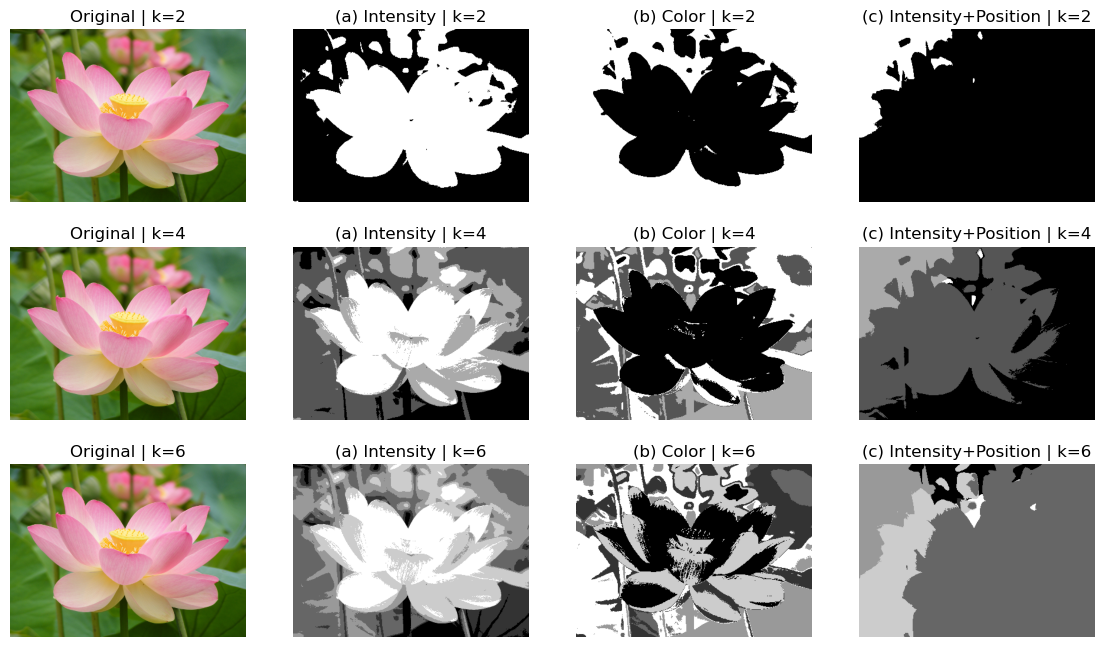

In [13]:

# k-means clustering by Intensity
def task_3_a(k): 
    print("Task 3 (a) with k =", k)
    img = cv.imread('../images/flower.png', cv.IMREAD_GRAYSCALE)
    # return img

    centers = np.random.randint(255, size=k)
    # print("-> Initial Centers:",centers)

    rounds = 100
    stop = 0

    img_cpy = img.copy()

    for r in range(rounds):

        # dists = np.array([np.abs(np.subtract(img, c)) for c in centers])
        # c_index = np.argmin(dists, axis=0)
        # print(dists.shape, c_index.shape)

        # for x in range(img.shape[0]):
        #     for y in range(img.shape[1]):
        #         img_cpy[x,y] = c_index[x,y]

        # print(img_cpy)

        for x in range(img.shape[0]):
            for y in range(img.shape[1]):
                I = img[x,y] # Value of Pixel
                dist = np.abs(np.subtract(centers, I)) # Centers [A,B,C,..] - PixelValue
                img_cpy[x,y] = np.argmin(dist) # Get Index of closest cluster-center

        cluster_centers = centers.copy()

        for c in range(k):
            filter = img_cpy == c
            if(np.count_nonzero(filter) > 0):
                cluster_centers[c] = np.floor(np.nanmean((img[filter])))

        # print(centers, cluster_centers)
        # print(np.sum(np.abs(np.subtract(centers, cluster_centers))))
        if np.sum(np.abs(np.subtract(centers, cluster_centers))) == 0:
            stop = 1
        centers = np.sort(cluster_centers)


        if stop == 1:
            print("-> Finished after",r,"Round(s)")# with Centers at:",centers)
            break

    img_cpy = cv.multiply(img_cpy, 255/(k-1))

    return img_cpy

##########################################################################################################
##########################################################################################################
##########################################################################################################
##########################################################################################################

def task_3_b(k):
    print("Task 3 (b) with k =", k)
    img = cv.imread('../images/flower.png')
    # return img

    centers = np.random.randint(255, size=(k,3))
    # print("-> Initial Centers:",np.array_str(centers, max_line_width=np.inf))


    rounds = 100
    stop = 0

    img_cpy = cv.cvtColor(img, cv.COLOR_BGR2GRAY).copy()

    # Do k-means in rounds - max round is given; if centers dont move anymore, loop is broken out of
    for r in range(rounds):

        # Calculate for each pixel, which cluster it belongs to
        for x in range(img.shape[0]):
            for y in range(img.shape[1]):
                I = img[x,y] # (r,g,b)
                dist = centers - I # [(c_1 - r, c_1 - b, c_1 - g), (c_2 - r, ...), ...]
                dists = np.linalg.norm(dist, axis=1)
                img_cpy[x,y] = np.argmin(dists)

        cluster_centers = centers.copy()

        # for every cluster, calculate the new center point
        # print("Cluster Centers:",cluster_centers, r)
        for c in range(k):
            filter = img_cpy == c
            if(np.count_nonzero(filter) > 0):
                cluster_centers[c][0] = np.floor(np.nanmean(img[:,:,0][filter]))
                cluster_centers[c][1] = np.floor(np.nanmean(img[:,:,1][filter]))
                cluster_centers[c][2] = np.floor(np.nanmean(img[:,:,2][filter]))
            # print(centers[c],"=>", cluster_centers[c])

        change = np.sum(np.subtract(centers, cluster_centers))
        # print(change, r)

        if change == 0:
            stop = 1

        centers = np.sort(cluster_centers)


        if stop == 1:
            print("-> Finished after",r,"Round(s)")#,np.array_str(centers, max_line_width=np.inf))
            break

    img_cpy = cv.multiply(img_cpy, 255/(k-1))
    return img_cpy

##########################################################################################################
##########################################################################################################
##########################################################################################################
##########################################################################################################



def task_3_c(k):
    print("Task 3 (c) with k =", k)
    img = cv.imread('../images/flower.png')
    img_intensity = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            img[x,y,0] = img_intensity[x,y]
            img[x,y,1] = x
            img[x,y,2] = y


    centers = np.array([[np.random.randint(0,255), 
                            np.random.randint(0,img.shape[0]), 
                            np.random.randint(0,img.shape[1])] 
                        for _ in range(k)])
    # print("-> Initial Centers:",np.array_str(centers))


    rounds = 100
    stop = 0

    img_cpy = cv.cvtColor(img, cv.COLOR_BGR2GRAY).copy()

    # Do k-means in rounds - max round is given; if centers dont move anymore, loop is broken out of
    for r in range(rounds):

        # Calculate for each pixel, which cluster it belongs to
        for x in range(img.shape[0]):
            for y in range(img.shape[1]):
                I = np.array([img[x,y,0], x, y]) # Intensity, x, y
                dist = centers - I # [(c_1 - I, c_1 - X, c_1 - Y), (c_2 - I, ...), ...]
                dists = np.linalg.norm(dist, axis=1)
                img_cpy[x,y] = np.argmin(dists)

        cluster_centers = centers.copy()

        # for every cluster, calculate the new center point
        # print("Cluster Centers:",cluster_centers, r)
        for c in range(k):
            filter = img_cpy == c
            if(np.count_nonzero(filter) > 0):
                cluster_centers[c][0] = np.floor(np.nanmean(img[:,:,0][filter]))
                cluster_centers[c][1] = np.floor(np.nanmean(img[:,:,1][filter]))
                cluster_centers[c][2] = np.floor(np.nanmean(img[:,:,2][filter]))
            # print(centers[c],"=>", cluster_centers[c])

        change = np.sum(np.subtract(centers, cluster_centers))
        # print(change, r)

        if change < 10:
            stop = 1

        centers = np.sort(cluster_centers)


        if stop == 1:
            print("-> Finished after",r,"Round(s)")#,np.array_str(centers, max_line_width=np.inf))
            break

    img_cpy = cv.multiply(img_cpy, 255/(k-1))
    return img_cpy

def orig_img(k):
    # ignore k
    return cv.imread('../images/flower.png')

_, ax = plt.subplots(3, 4, figsize=(14, 8))

images = [("Original", orig_img), ("(a) Intensity", task_3_a), ("(b) Color", task_3_b), ("(c) Intensity+Position", task_3_c)]

for k in range(3):
    for i in range(4):
        title, fkt = images[i]
        img = cv.cvtColor(fkt(k*2+2), cv.COLOR_BGR2RGB)
        ax[k, i].set_title(title+" | k="+str(k*2+2))
        ax[k, i].imshow(img, norm=None)
        ax[k, i].axis("off")

### 4. Graph Cuts

Consider the graph shown in Figure 1 to answer the following questions:

**(a)** Compute the eigenvector y corresponding to the second smallest eigenvalue of the following generalized eigenvalue problem

(D −W)y = λDy

where W is the affinity matrix of the graph and D is a diagonal matrix thatcontains the degrees of the vertices.

Hint: use cv2.eigen to solve the equivalent standard eigenvalue problem
$$
D^{-0.5}(D-W)D^{0.5}z = \lambda z; z = D^{0.5}y
$$

**(b)** Use the result of part (a) to find the minimum normalized cut NCut(C1,C2).
The sign of the values in the eigenvector computed in (a) determine the separa-
tion of the vertices into the two clusters C1,C2. List the nodes in each cluster
and compute the cost of the normalized cut.
(5 Points)

In [11]:
def task_4_a():
    print("Task 4 (a) ...")
    # graph of form A B C D E F G H adjacency matrix
    graph = np.array(
        [
            # A    B    C    D    E    F    G    H
            [0.0, 1.0, 0.2, 1.0, 0.0, 0.0, 0.0, 0.0], #A
            [1.0, 0.0, 0.1, 0.0, 1.0, 0.0, 0.0, 0.0], #B
            [0.2, 0.1, 0.0, 1.0, 0.0, 1.0, 0.3, 0.0], #C
            [1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0], #D
            [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0], #E
            [0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0], #F
            [0.0, 0.0, 0.3, 0.0, 1.0, 1.0, 0.0, 1.0], #G
            [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0], #H
        ]
    )

    eigenval, eigenvec = None, None
    eigenvals_vecs = cv.eigen(graph, eigenval, eigenvec)
    _, eigenval, eigenvec = eigenvals_vecs
    D = compute_degree_node_mat(graph)  # construct the D matrix
    W = graph  # construct the W matrix
    
    # get second smalles eigenval
    second_smallest = np.sort(eigenval)[-2]
    sec_small_idx = np.argmax(eigenval == second_smallest)
    print("D: \n", D)
    print("W: \n", W)
    # needs to be continued

def compute_degree_node_mat(graph_mat):
    # get vals where a edge exists
    masked_graph = (graph_mat > 0.0) * 1
    # sum over nodes to get all degrees 
    degree = masked_graph.sum(axis=1)
    return np.diag(degree)



task_4_a()

Task 4 (a) ...
D: 
 [[3 0 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 0]
 [0 0 5 0 0 0 0 0]
 [0 0 0 3 0 0 0 0]
 [0 0 0 0 3 0 0 0]
 [0 0 0 0 0 3 0 0]
 [0 0 0 0 0 0 4 0]
 [0 0 0 0 0 0 0 2]]
W: 
 [[0.  1.  0.2 1.  0.  0.  0.  0. ]
 [1.  0.  0.1 0.  1.  0.  0.  0. ]
 [0.2 0.1 0.  1.  0.  1.  0.3 0. ]
 [1.  0.  1.  0.  0.  1.  0.  0. ]
 [0.  1.  0.  0.  0.  0.  1.  1. ]
 [0.  0.  1.  1.  0.  0.  1.  0. ]
 [0.  0.  0.3 0.  1.  1.  0.  1. ]
 [0.  0.  0.  0.  1.  0.  1.  0. ]]
